In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import scipy.stats as st
import pingouin as pg
from pingouin import kruskal
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import gc

/home/kipengui/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
big_data=pd.read_csv('big_data.csv')

In [6]:
big_data['gdpppp']=big_data['gdpppp'].astype('int32')
big_data['income']=big_data['income'].astype('float32')
big_data['c_i_child']=big_data['c_i_child'].astype('int8')
big_data['gini']=big_data['gini'].astype('float32')
big_data.drop(columns='Country Name', inplace=True)
big_data.drop(columns='Region', inplace=True)
big_data['IGEincome']=big_data['IGEincome'].astype('float32')
big_data['c_i_parent']=big_data['c_i_parent'].astype('int8')

In [4]:
big_data.head()

,Country Code,gdpppp,income,c_i_child,gini,IGEincome,c_i_parent
0,ALB,7297,728.897949,1,0.32141,0.4,1
1,ALB,7297,916.662354,2,0.32141,0.4,1
2,ALB,7297,1010.916016,3,0.32141,0.4,1
3,ALB,7297,1086.907837,4,0.32141,0.4,1
4,ALB,7297,1132.699707,5,0.32141,0.4,1


In [5]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600000 entries, 0 to 11599999
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Country Code  object 
 1   gdpppp        int32  
 2   income        float32
 3   c_i_child     int8   
 4   gini          float32
 5   IGEincome     float32
 6   c_i_parent    int8   
dtypes: float32(3), int32(1), int8(2), object(1)
memory usage: 287.6+ MB


# Mission 4

ANOVA

In [6]:
pg.anova(data=big_data, dv='income', between='Country Code', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Country Code,5.105183e+14,115,4.439290e+12,99477.274321,0.0,0.496528
1,Within,5.176584e+14,11599884,4.462617e+07,NaN,NaN,NaN


In [7]:
# interprétation de l'éta carré

In [8]:
# l'anova teste l'égalité des moyennes
# ici la p-value est quasiment nulle, on rejète donc l'hypothèse
# pour que ce test soit correct, il y a 2 conditions à vérifier, la normalité dans les groupes et l'égalités des variance entre les groupes

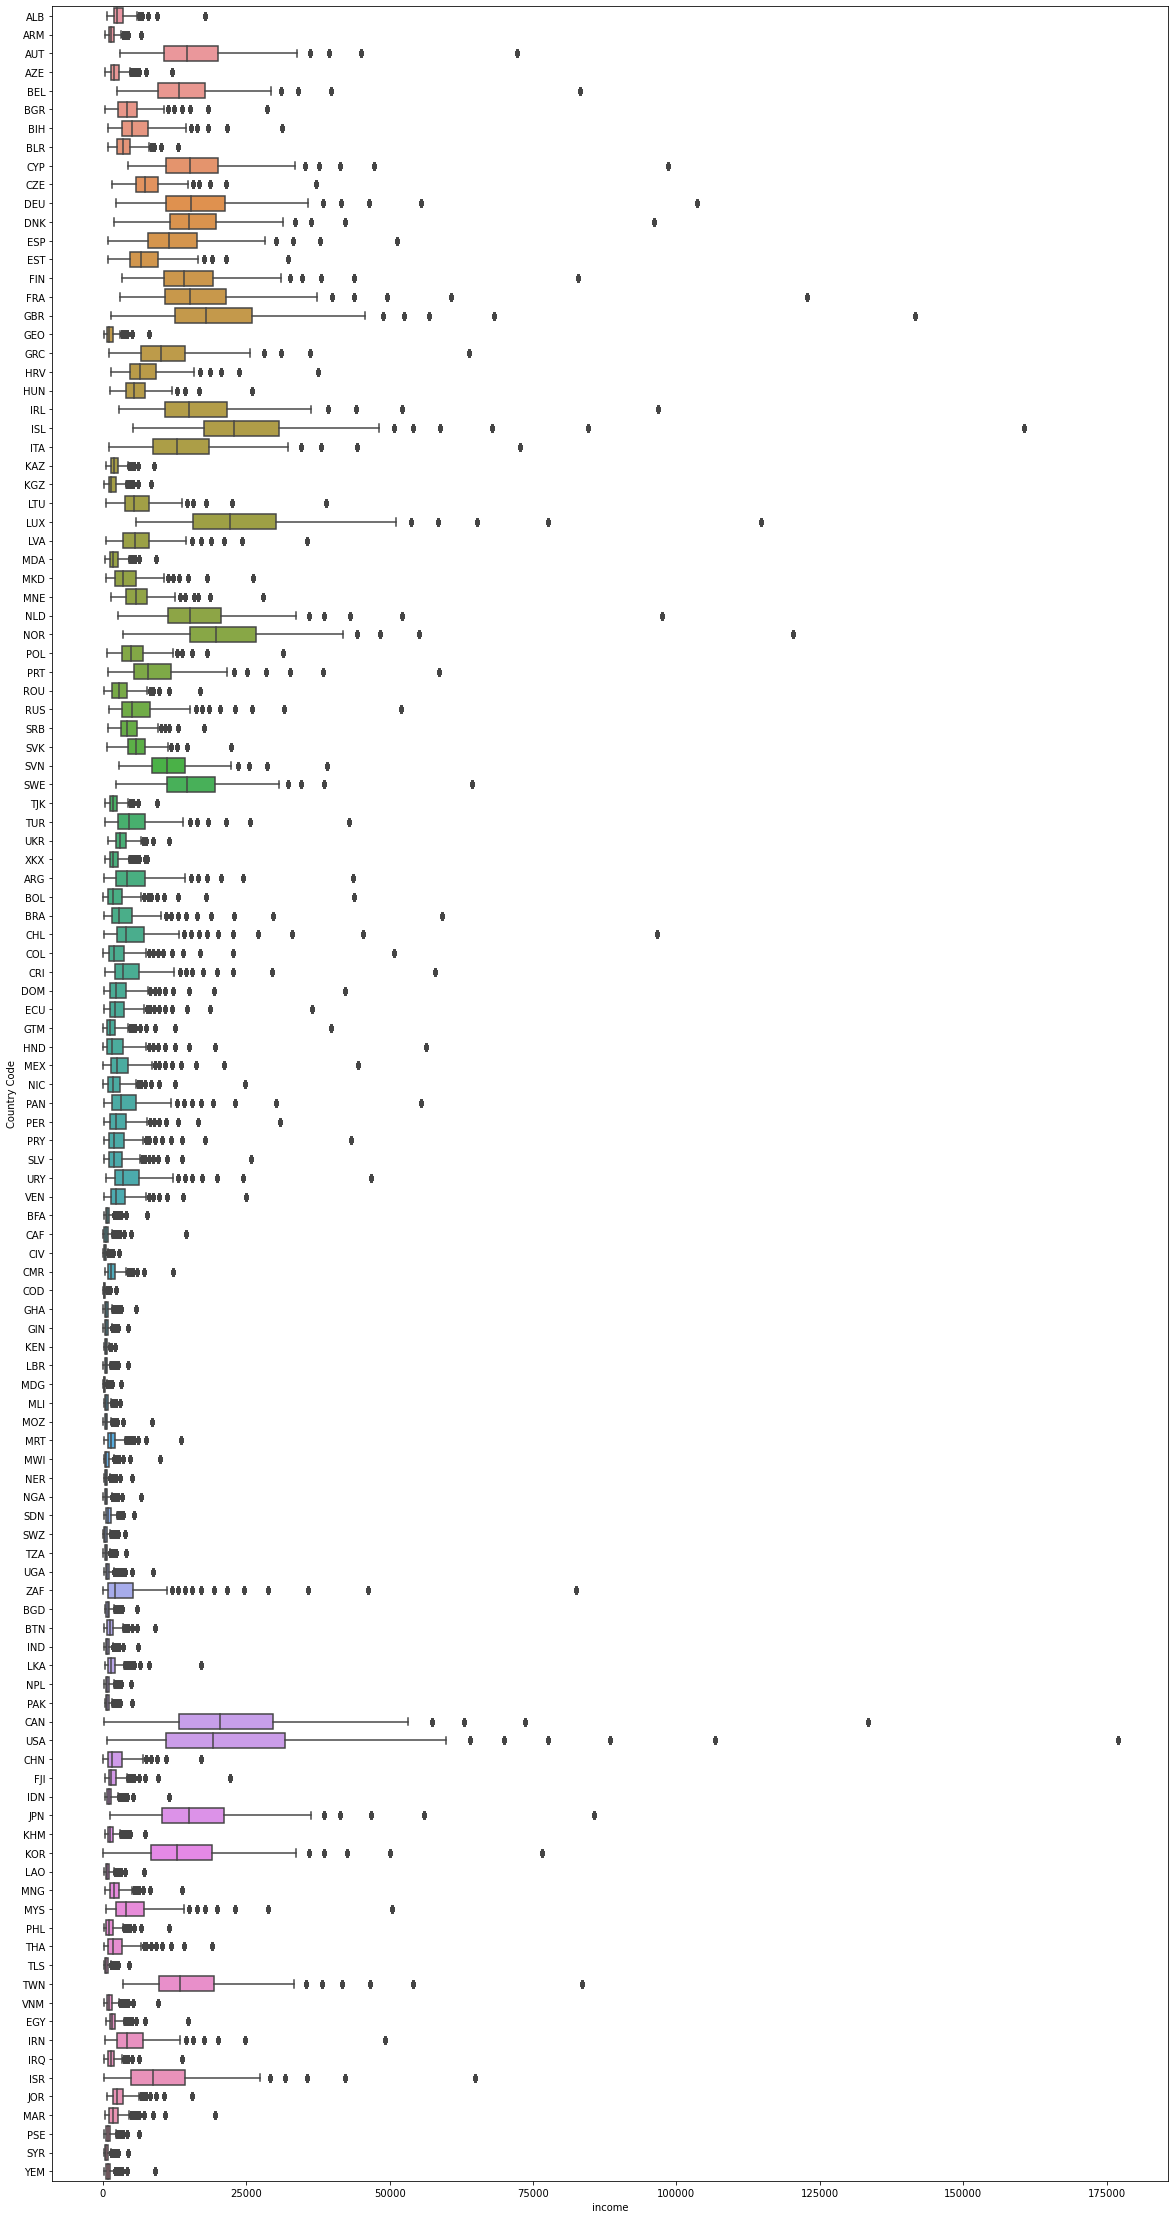

In [9]:
plt.figure(figsize=(20,40))
sns.boxplot(data=big_data, x='income', y='Country Code')
plt.savefig('p7_anova.jpg')
plt.show()

Test de Kruskal-Wallis

In [10]:
kruskal(data=big_data, dv='income', between='Country Code')

,Source,ddof1,H,p-unc
Kruskal,Country Code,115,8.594345e+06,0.0


In [11]:
# ce test teste l'égalité des médianes
# ici la p-value est quasiment nulle, on rejette donc l'hypothèse

Calcul du revenu moyen du pays et les revenus en logarithme

In [12]:
big_data['income_log']=np.log(big_data['income'])
big_data['mj_log']=np.log(big_data['gdpppp'])

ANOVA comprenant les données exprimées en logarithme

In [13]:
pg.anova(data=big_data, dv='income_log', between='Country Code', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Country Code,1.616723e+07,115,140584.651159,272219.844628,0.0,0.729639
1,Within,5.990620e+06,11599884,0.516438,NaN,NaN,NaN


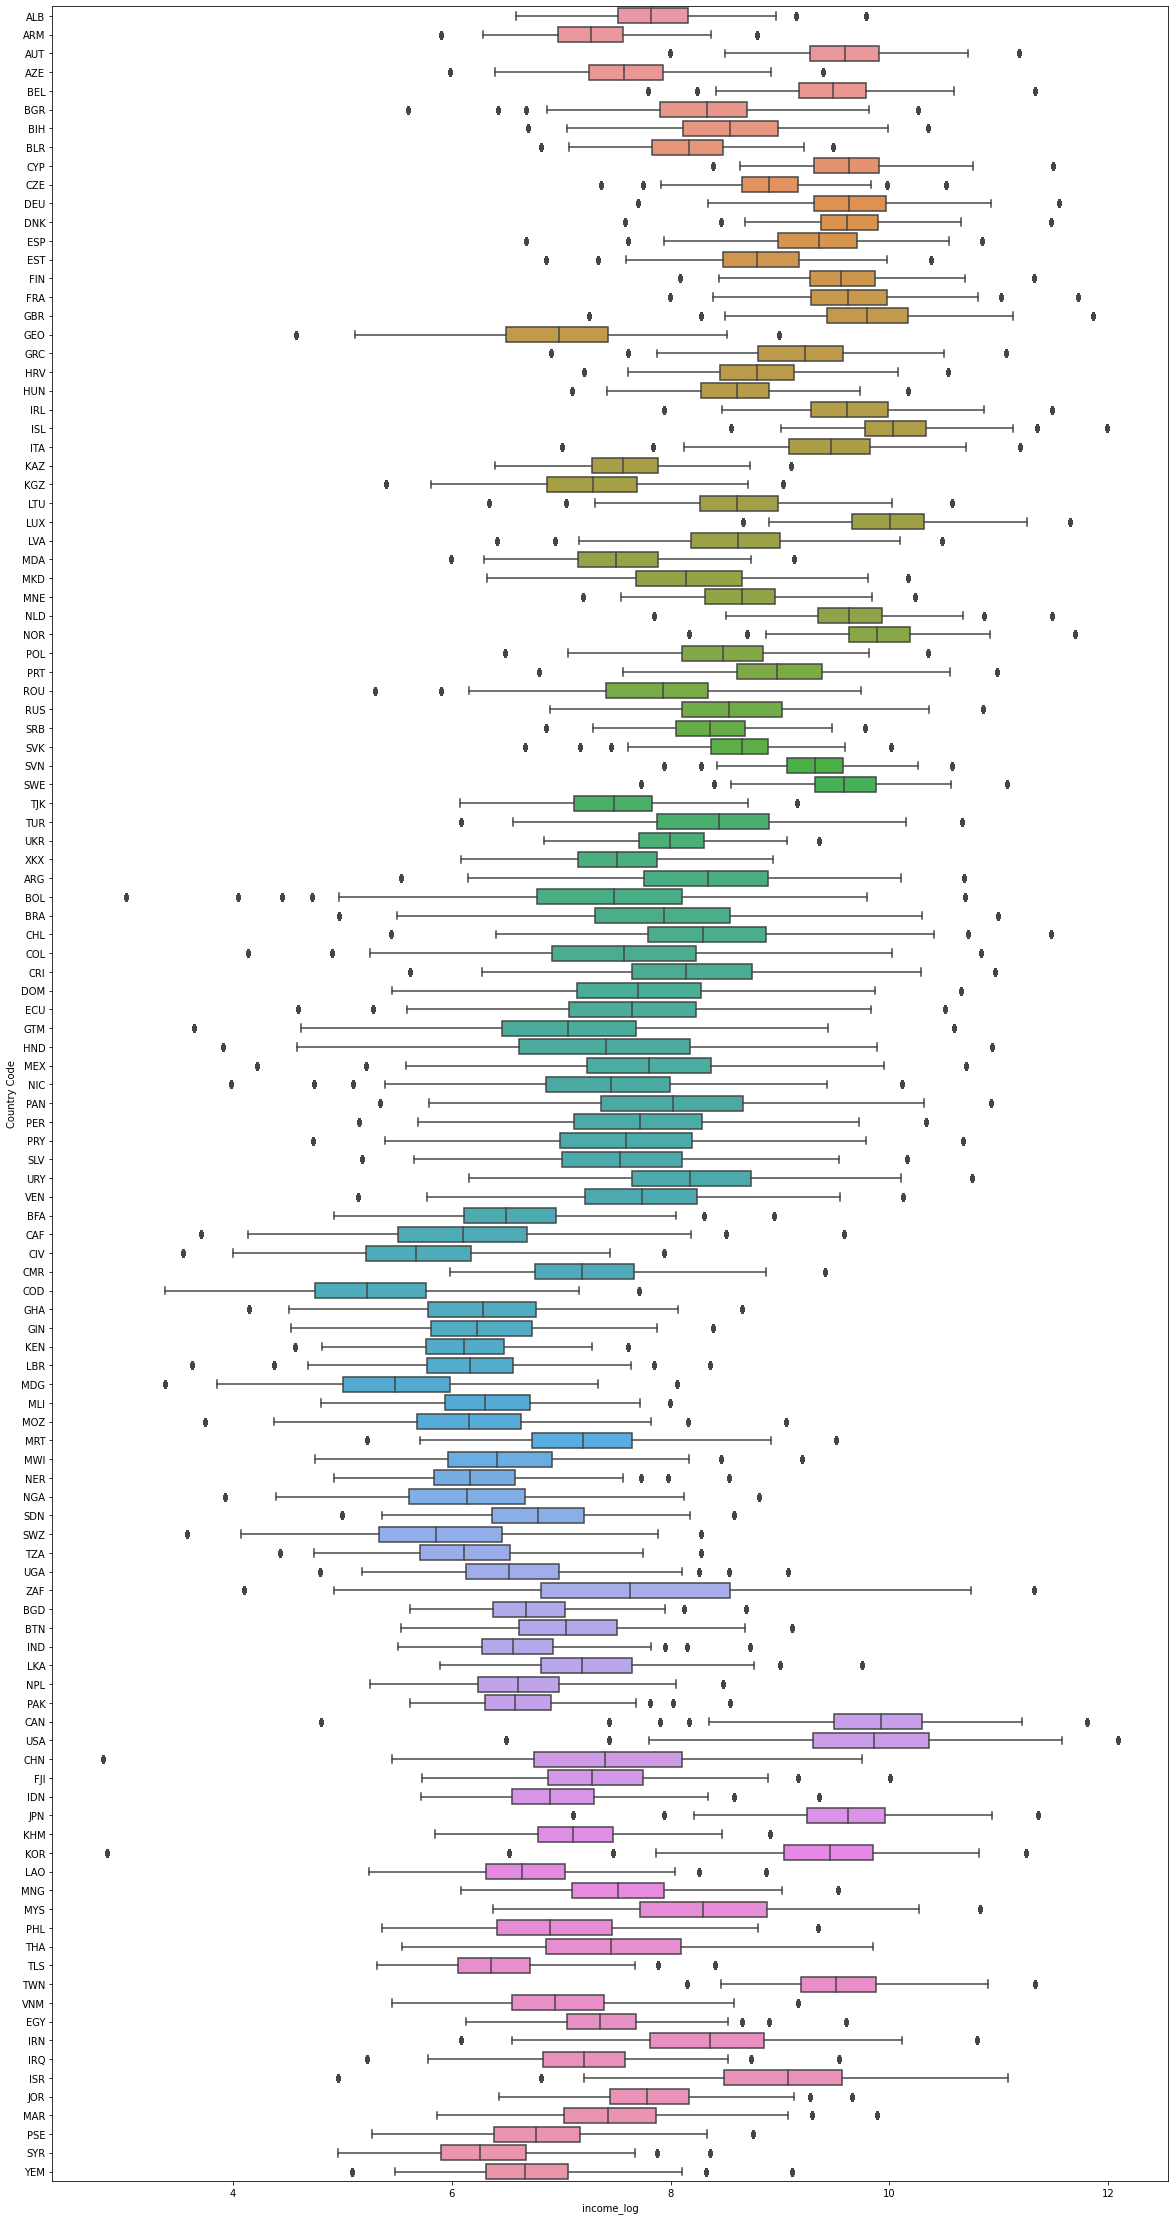

In [14]:
plt.figure(figsize=(20,40))
sns.boxplot(data=big_data, x='income_log', y='Country Code')
plt.savefig('p7_anova_log.jpg')
plt.show()

In [15]:
# test de normalité
x=big_data['c_i_child']
pg.normality(x)

/home/kipengui/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
c_i_child,0.98711,0.0,False


In [16]:
#test d'égalité des variances
pg.homoscedasticity(big_data[['income', 'c_i_child']])

,W,pval,equal_var
levene,3.827794e+06,0.0,False


### Régressions linéaires

régression sans log

In [17]:
#regression linéaire
lm=pg.linear_regression(big_data[['gdpppp', 'gini']], big_data['income'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-548.253906,11.154934,-49.149004,0.0,0.448156,0.448156,-570.117178,-526.390635
1,gdpppp,0.483757,0.000170,2846.452526,0.0,0.448156,0.448156,0.483424,0.484090
2,gini,1615.002718,25.231016,64.008627,0.0,0.448156,0.448156,1565.550829,1664.454606


Ce modèle n'explique que 44,8% de la variance expliquée.

In [18]:
res=lm.residuals_

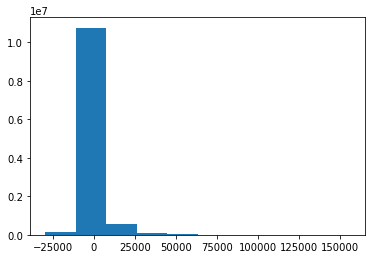

In [19]:
plt.hist(res)
plt.savefig('p7_hits_res.jpg')
plt.show()

In [20]:
pg.normality(res)

/home/kipengui/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
0,0.574412,0.0,False


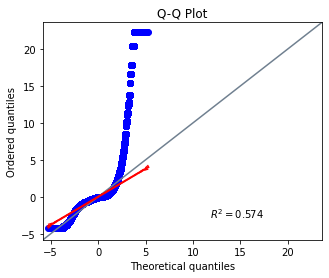

In [21]:
pg.qqplot(res)
plt.savefig('p7_qqplot_res.jpg')

income=coef1 * gdpppp + coef2 * gini + intercept + du bruit

régression avec log

In [22]:
lm2=pg.linear_regression(big_data[['mj_log', 'gini']], big_data['income_log'])
lm2

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.876623,0.002350,373.054994,0.0,0.655674,0.655674,0.872017,0.881229
1,mj_log,0.862827,0.000200,4305.150362,0.0,0.655674,0.655674,0.862435,0.863220
2,gini,-1.556303,0.002809,-553.962846,0.0,0.655674,0.655674,-1.561809,-1.550797


Ce modèle explique 65,6% de la variance expliquée

In [23]:
big_data.shape

(11600000, 9)

In [24]:
res2=lm2.residuals_

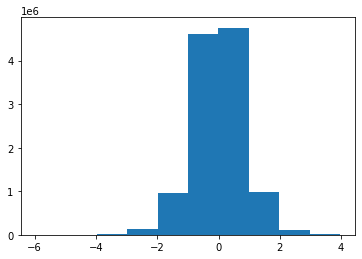

In [25]:
plt.hist(res2)
plt.savefig('p7_hits_res2.jpg')
plt.show()

In [26]:
# l'analyse des résidus semblent suivre une loi Gaussienne

In [27]:
pg.normality(res2)

/home/kipengui/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
0,0.992859,0.0,False


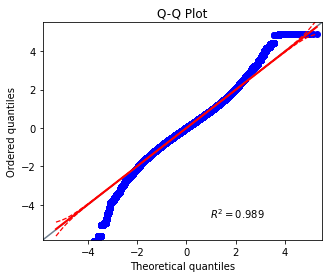

In [28]:
pg.qqplot(res2)
plt.savefig('p7_qqplot_res2.jpg')
plt.show()

In [13]:
big_data['income_log']=np.log(big_data['income'])
big_data['mj_log']=np.log(big_data['gdpppp'])

régression linéaire incluant le revenu des parents sans log

In [7]:
lm3=pg.linear_regression(big_data[['gdpppp', 'gini', 'c_i_parent']], big_data['income'])
lm3

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1111.931981,11.721065,-94.866118,0.0,0.449298,0.449298,-1134.904850,-1088.959113
1,gdpppp,0.483997,0.000170,2850.698719,0.0,0.449298,0.449298,0.483665,0.484330
2,gini,1625.529102,25.204988,64.492358,0.0,0.449298,0.449298,1576.128229,1674.929976
3,c_i_parent,11.020801,0.071057,155.098427,0.0,0.449298,0.449298,10.881533,11.160070


Ce modèle explique 44,9% de la variance expliquée

In [8]:
res3=lm3.residuals_

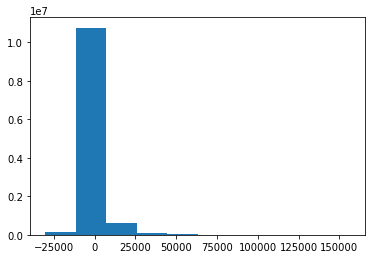

In [9]:
plt.hist(res3)
plt.savefig('p7_hits_res3.jpg')
plt.show()

In [10]:
pg.normality(res3)

/home/kipengui/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
0,0.571115,0.0,False


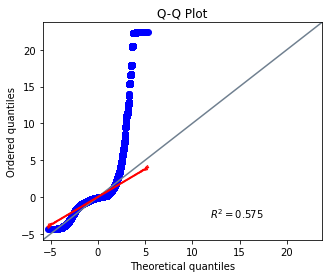

In [11]:
pg.qqplot(res3)
plt.savefig('p7_qqplot_res3.jpg')
plt.show()

régression linéaire incluant le revenu des parents avec log

In [14]:
lm4=pg.linear_regression(big_data[['mj_log', 'gini', 'c_i_parent']], big_data['income_log'])
lm4

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.762590,0.002384,319.912189,0.0,0.657668,0.657668,0.757918,0.767262
1,mj_log,0.863443,0.000200,4320.449405,0.0,0.657668,0.657668,0.863051,0.863835
2,gini,-1.554475,0.002801,-554.919760,0.0,0.657668,0.657668,-1.559966,-1.548985
3,c_i_parent,0.002137,0.000008,259.949266,0.0,0.657668,0.657668,0.002121,0.002153


Ce modèle explique 65,8% de la variance expliquée

In [15]:
res4=lm4.residuals_

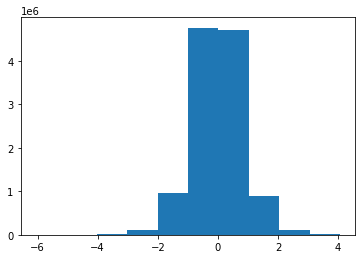

In [16]:
plt.hist(res4)
plt.savefig('p7_hits_res4.jpg')
plt.show()

In [17]:
pg.normality(res4, method="jarque_bera")

,W,pval,normal
0,1.189069e+06,0.0,False


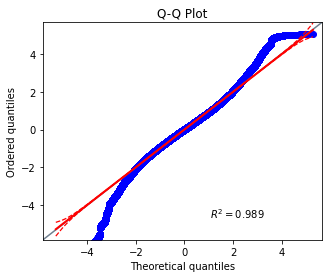

In [18]:
pg.qqplot(res4)
plt.savefig('p7_qqplot_res4.jpg')
plt.show()

In [19]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('income ~ gdpppp+gini', data=big_data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,29.517804,Intercept
1,1.183014,gdpppp
2,1.183014,gini
